
## **Handwriting Recognition**

Handwriting recognition, also known as Handwritten Text Recognition, is the ability of a computer to receive and interpret intelligible handwritten input from sources such as paper documents, photographs, touch-screens and other devices. A handwriting recognition system handles formatting, performs correct segmentation into characters, and finds the most plausible words.

This project seeks to classify an individual handwritten word so that handwritten text can be translated to a digital form. We can used two main approaches to accomplish this task: classifying words directly and character segmentation. For the former, we use Convolutional Neural Network (CNN) with various architectures to train a model that can accurately classify words. For the latter, we use Long Short Term Memory networks (LSTM) with convolution to construct bounding boxes for each character. We then pass the segmented characters to a CNN for classiﬁcation, and then reconstructeachwordaccordingtotheresultsofclassiﬁcation and segmentation.
In this project we used **Handwriting Recognition using a Random Forest Classifier** approach.


BY 

---
1. Mukul Omer -17HCS4123
2. Arun Rajak -17HCS4104
3. Sachin Singh-17HCS41


---




**Import libraries and dataset from Scikit-Learn**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.datasets import load_digits

digits = load_digits()

**Analyze a sample image**

<Figure size 432x288 with 0 Axes>

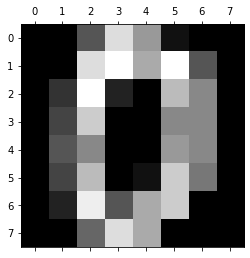

In [2]:
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[0]) 
pl.show()

<matplotlib.figure.Figure at 0x8fab828>


**Analyze image pixels**

Each element represents the pixel of our greyscale image. The value ranges from 0 to 255 for an 8 bit pixel.

**digits.images[0]**

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

**Visualize first 15 images**

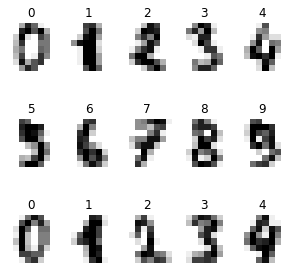

In [7]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(5,5))
for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [8]:
import random
from sklearn import ensemble

#Define variables
n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))
y = digits.target

#Create random indices 
sample_index=random.sample(range(len(x)),int(len(x)/5)) #20-80
valid_index=[i for i in range(len(x)) if i not in sample_index]

#Sample and validation images
sample_images=[x[i] for i in sample_index]
valid_images=[x[i] for i in valid_index]

#Sample and validation targets
sample_target=[y[i] for i in sample_index]
valid_target=[y[i] for i in valid_index]

#Using the Random Forest Classifier
classifier = ensemble.RandomForestClassifier()

#Fit model with sample data
classifier.fit(sample_images, sample_target)

#Attempt to predict validation data
score=classifier.score(valid_images, valid_target)
print('Random Tree Classifier:\n') 
print('Score\t'+str(score))

Random Tree Classifier:

Score	0.9360222531293463


<Figure size 432x288 with 0 Axes>

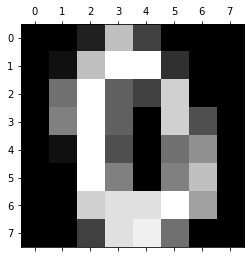

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
i=150

pl.gray() 
pl.matshow(digits.images[i]) 
pl.show() 
classifier.predict(x)